# Machine-Intelligence-Watanebe

A machine intelligence that uses HTM to memorize music in associative memory.

In [1]:
from music21 import *

inputMidi = converter.parse('./data/NorwegianWood.mid')
parseMidi = inputMidi.parts[1].recurse()
notes = []
for element in parseMidi:
    if isinstance(element, note.Note):
        notes.append([int(element.pitch.ps),float(round(element.quarterLength,6))])

notesDict={}
for i in range(len(notes)):
    notesDict[i]=notes[i] 
print(notesDict)

{0: [71, 1.5], 1: [71, 0.333333], 2: [73, 0.25], 3: [71, 0.5], 4: [69, 0.333333], 5: [68, 1.666667], 6: [66, 0.5], 7: [69, 0.333333], 8: [68, 0.666667], 9: [64, 1.5], 10: [62, 0.5], 11: [69, 0.5], 12: [61, 0.5], 13: [59, 1.5], 14: [71, 1.5], 15: [71, 0.333333], 16: [73, 0.25], 17: [71, 0.5], 18: [69, 0.5], 19: [68, 1.5], 20: [66, 0.5], 21: [69, 0.5], 22: [68, 0.5], 23: [64, 1.5], 24: [62, 0.5], 25: [69, 0.5], 26: [61, 0.5], 27: [59, 1.5], 28: [71, 0.5], 29: [79, 0.5], 30: [79, 0.5], 31: [79, 0.5], 32: [79, 0.5], 33: [78, 0.5], 34: [78, 0.5], 35: [78, 0.5], 36: [76, 0.5], 37: [76, 0.5], 38: [74, 0.5], 39: [76, 0.5], 40: [74, 0.333333], 41: [76, 1.666667], 42: [69, 0.5], 43: [79, 0.5], 44: [79, 0.5], 45: [79, 0.5], 46: [79, 0.5], 47: [78, 0.333333], 48: [78, 0.666667], 49: [78, 0.5], 50: [76, 0.5], 51: [76, 0.5], 52: [74, 0.333333], 53: [76, 0.666667], 54: [74, 0.333333], 55: [76, 1.666667], 56: [71, 1.5], 57: [73, 0.5], 58: [71, 0.5], 59: [69, 0.5], 60: [68, 1.5], 61: [66, 0.5], 62: [69

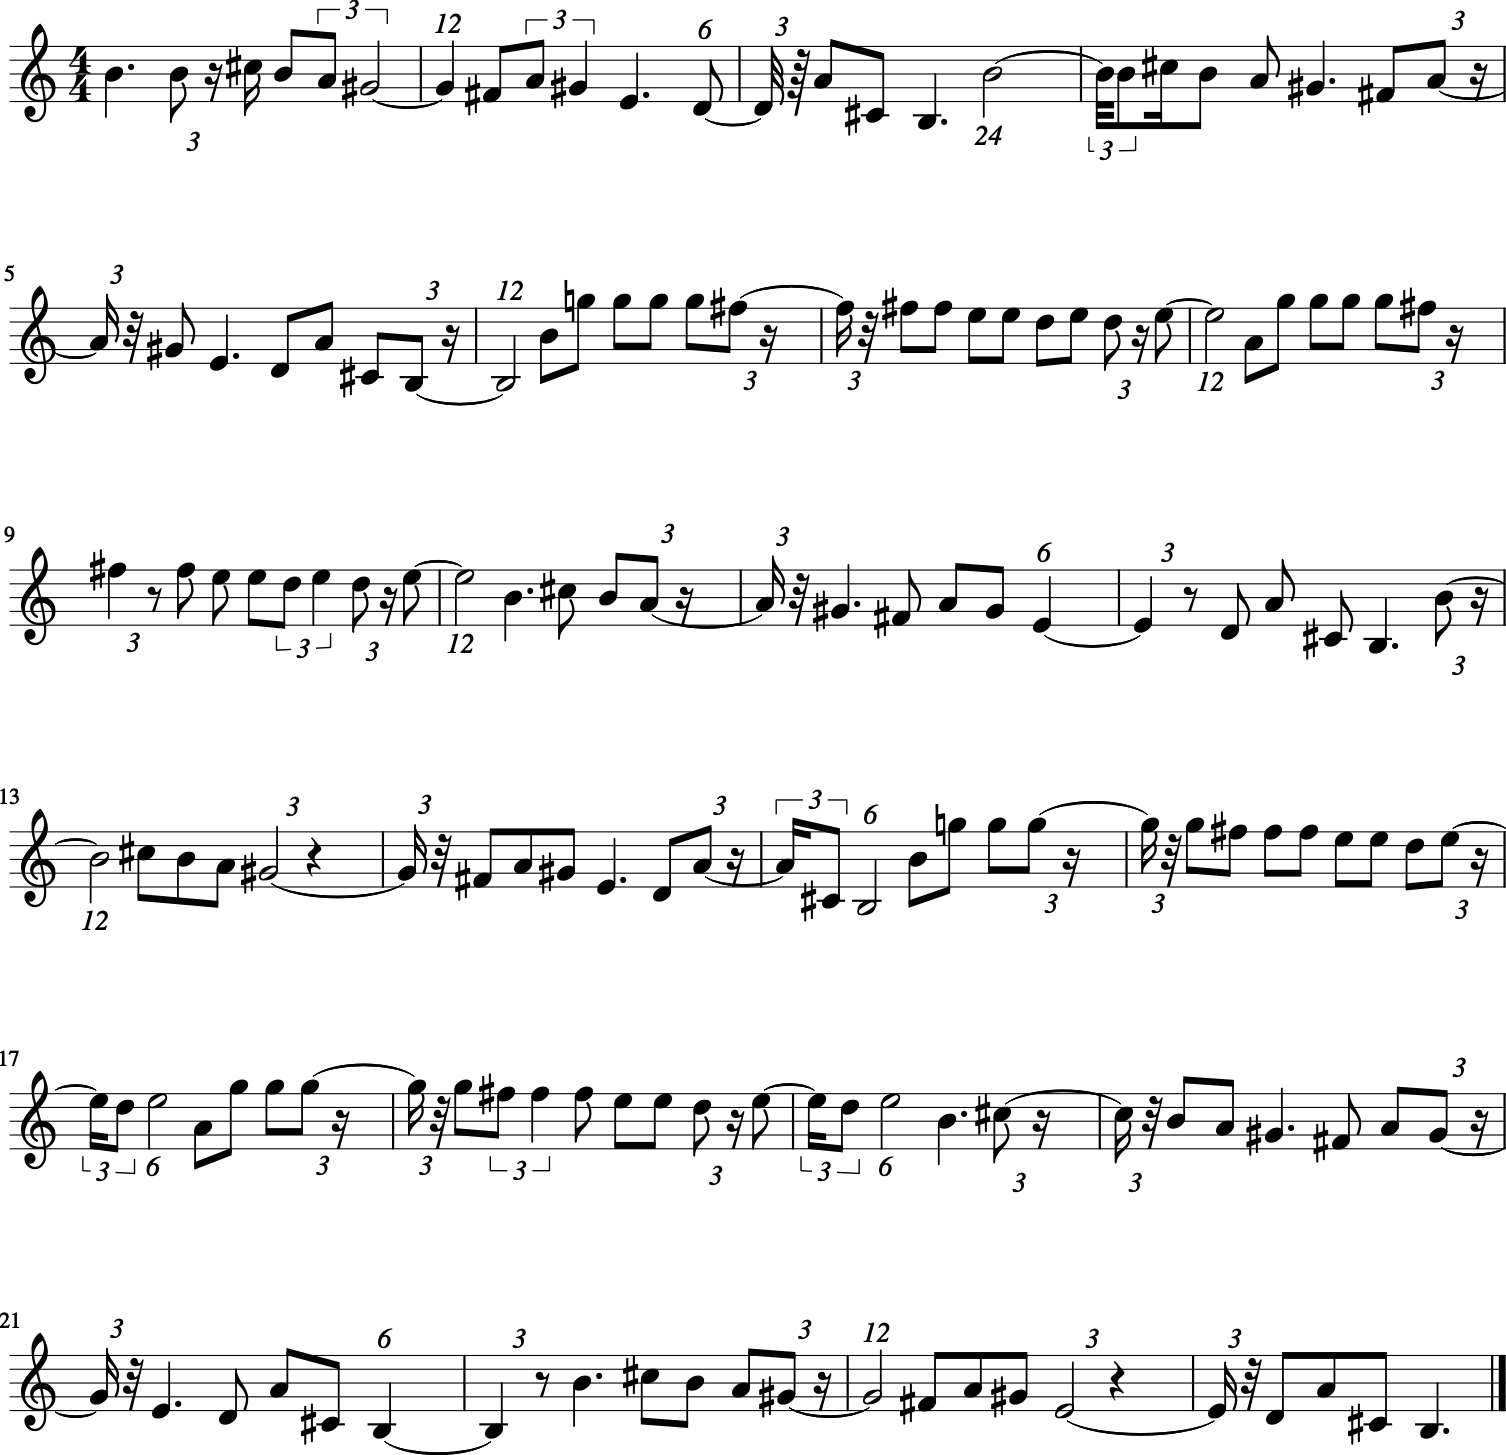

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
s1 = stream.Stream()

for n in range(len(list(notesDict))):
    noteMidi = notesDict[n][0]
    noteLength=notesDict[n][1]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s1.append(n)
    
s1.show()
StreamPlayer=midi.realtime.StreamPlayer(s1)
StreamPlayer.play()

In [3]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
pitchParams = ScalarEncoderParameters()
pitchParams.minimum = 48
pitchParams.maximum = 83
pitchParams.activeBits = 3
pitchParams.size = 24
pitchParams.clipInput  = True

encPitch = ScalarEncoder(pitchParams)

In [5]:
lengthParams = ScalarEncoderParameters()
lengthParams.minimum = 0
lengthParams.maximum = 1
lengthParams.activeBits = 3
lengthParams.size = 24
lengthParams.clipInput  = True

encLength = ScalarEncoder(lengthParams)

In [6]:
for i in range(len(notesDict)):
    pitchBits        = encPitch.encode(notesDict[i][0])
    lengthBits = encLength.encode(notesDict[i][1])

    encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])

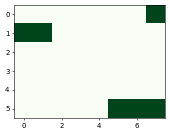

pitch:  59
length:  1.5
encodeSDR:  SDR( 48 ) 7, 8, 9, 45, 46, 47


In [7]:
for i in range(len(notesDict)):
    pitchBits        = encPitch.encode(notesDict[i][0])
    lengthBits = encLength.encode(notesDict[i][1])

    encoding = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    
    
    clear_output(wait = True)
    plt.cla
    encodingSDR=encoding.dense.reshape(6,8)
    plot = plt.figure(figsize=(4,3),dpi=50)
    plt.imshow(encodingSDR, cmap = "Greens")
    plt.pause(0.01)
    
    print("pitch: ",notesDict[i][0])
    print("length: ",notesDict[i][1])
    print("encodeSDR: ",encoding)

In [7]:
inputSDR  = SDR( dimensions = (48, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)
print(sp)

Spatial Pooler Connections:
    Inputs (48) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 17 / 17 / 17
    Connected Synapses on Segment Min/Mean/Max 3 / 8.3941 / 15
    Synapses Dead (0%) Saturated (0%)
    Synapses pruned (0%) Segments pruned (0%)



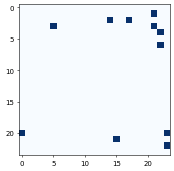

Spatial Pooler Connections:
    Inputs (48) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 17 / 17 / 17
    Connected Synapses on Segment Min/Mean/Max 3 / 8.32292 / 15
    Synapses Dead (0.0489175%) Saturated (0.00428922%)
    Synapses pruned (0%) Segments pruned (0%)



In [17]:
for i in range(len(notesDict)):
    pitchBits        = encPitch.encode(notesDict[i][0])
    lengthBits = encLength.encode(notesDict[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    clear_output(wait = True)
    plt.cla
    sampleSDR=activeSDR.dense.reshape(24,24)
    plot = plt.figure(figsize=(4,4),dpi=50)
    plt.imshow(sampleSDR, cmap = "Blues")
    plt.pause(0.01)
    
    print(sp)

In [8]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (4608) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



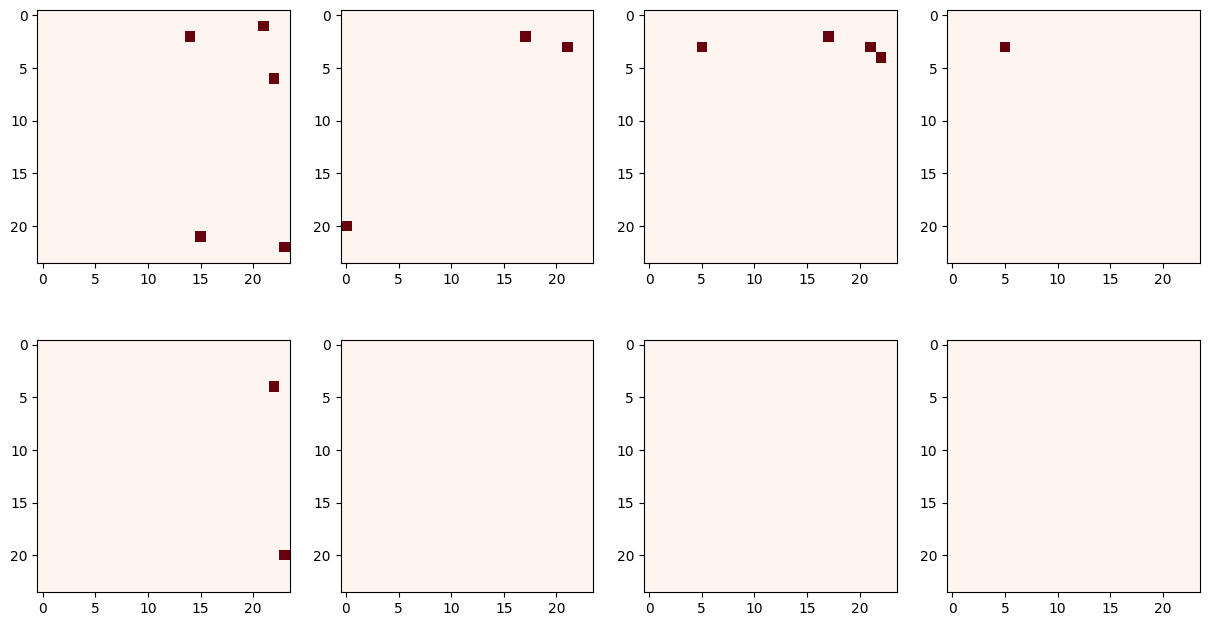

Temporal Memory Connections:
    Inputs (424) ~> Outputs (4608) via Segments (469)
    Segments on Cell Min/Mean/Max 0 / 0.10178 / 3
    Potential Synapses on Segment Min/Mean/Max 11 / 20.0256 / 71
    Connected Synapses on Segment Min/Mean/Max 11 / 20.0256 / 71
    Synapses Dead (0%) Saturated (0.0914608%)
    Synapses pruned (0%) Segments pruned (0%)



In [8]:
for i in range(len(notesDict)):
    pitchBits        = encPitch.encode(notesDict[i][0])
    lengthBits = encLength.encode(notesDict[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]

    reshapeActiveCells =tm.getActiveCells().dense.transpose().reshape(8,24,24)
    
    clear_output(wait = True)
    plt.cla
    plot = plt.figure(figsize=(15,8),dpi=50)
    
    for j in range(8):
        plt.subplot(2,4,j+1)
        plt.imshow(reshapeActiveCells[j], cmap = "Reds")
    plt.pause(0.01)
    
    print(tm)

In [9]:
predictor = Predictor( steps=[1,2,3,4,5,6,7], alpha=0.1)

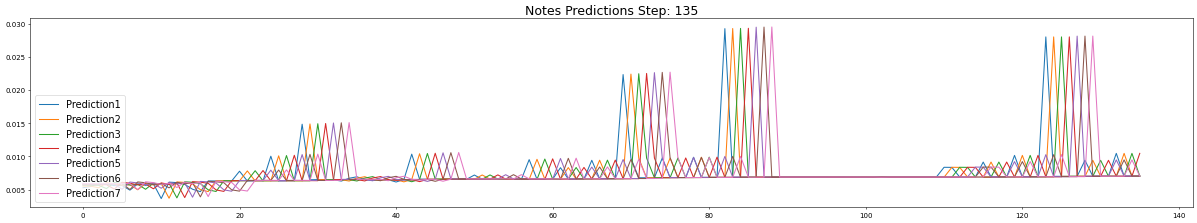

In [10]:
predictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
for i in range(len(notesDict)):
    pitchBits        = encPitch.encode(notesDict[i][0])
    lengthBits = encLength.encode(notesDict[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)

    predictor.learn(i, tm.getActiveCells() ,list(notesDict)[i])

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5,6,7):
        if pdf[n]:
            predictions[n]=notesDict[list(notesDict)[np.argmax( pdf[n] )] ] 
        else:
            predictions[n]=float('nan')
            
        clear_output(wait = True)
        plt.cla
        plot = plt.figure(figsize=(30,5),dpi=50)

        plt.plot(pdf[1],label="Prediction1")
        plt.plot(pdf[2],label="Prediction2")
        plt.plot(pdf[3],label="Prediction3")
        plt.plot(pdf[4],label="Prediction4")
        plt.plot(pdf[5],label="Prediction5")
        plt.plot(pdf[6],label="Prediction6")
        plt.plot(pdf[7],label="Prediction7")
        title = "Notes Predictions Step: "+str(i)
        plt.title(str(title), fontsize=18)
        plt.legend(loc='lower left', fontsize=14)
        plt.pause(0.01)
                
#print(predictions)

In [11]:
#trainNotes[[71, 1.5], [71, 0.333333], [73, 0.25], [71, 0.5], [69, 0.333333], [68, 1.666667], [66, 0.5]]

testNotesDict ={0:[71, 1.5], 1:[71, 0.5], 2:[72, 0.25], 3:[71, 0.25], 4:[69, 0.25], 5:[68, 1.5], 6:[66, 0.5]}

Score of testMidi.mid


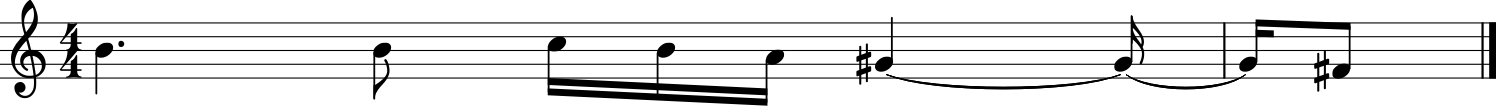

In [12]:
s2 = stream.Stream()

for n in range(len(list(testNotesDict))):
    noteMidi = testNotesDict[n][0]
    noteLength=testNotesDict[n][1]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s2.append(n)

print("Score of testMidi.mid")
s2.show()
StreamPlayer=midi.realtime.StreamPlayer(s2)
StreamPlayer.play()

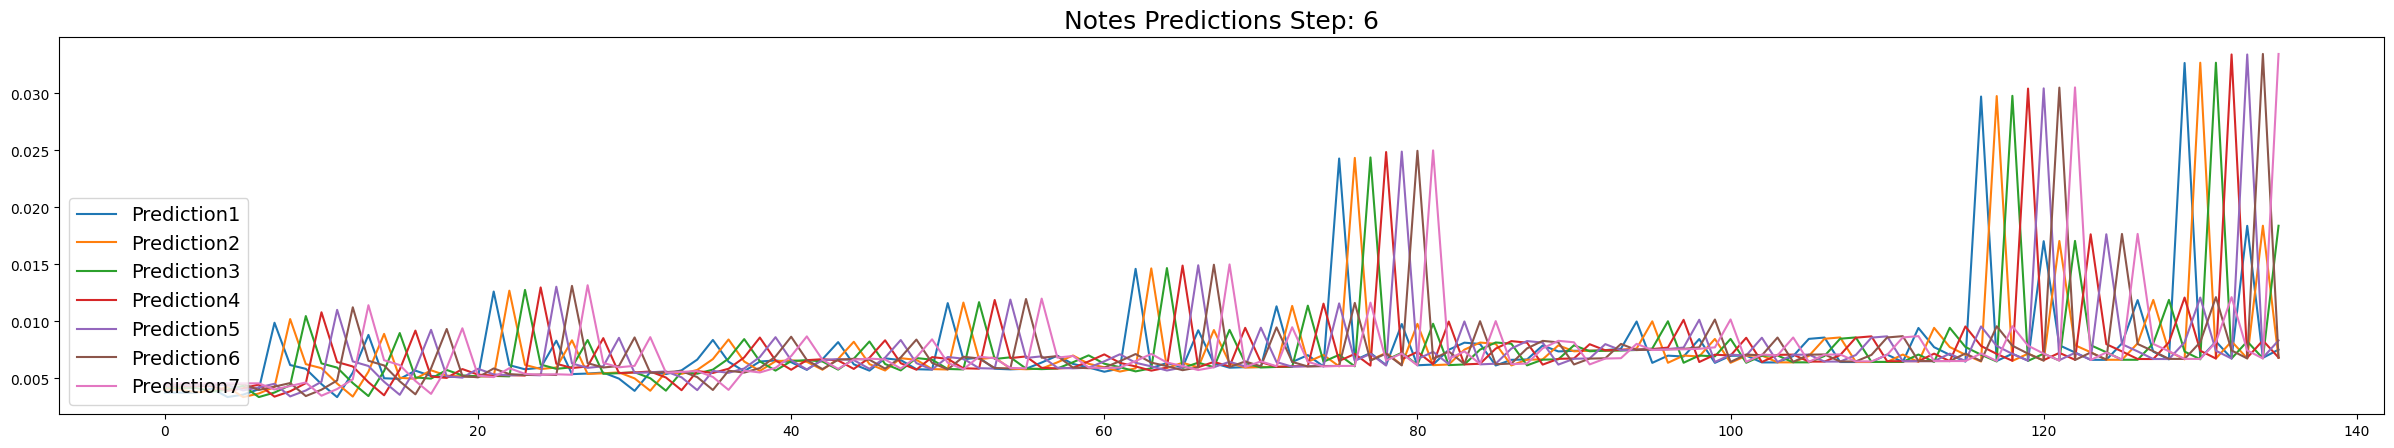

{1: [69, 0.5], 2: [68, 0.5], 3: [64, 1.5], 4: [62, 0.5], 5: [69, 0.5], 6: [61, 0.5], 7: [59, 1.5]}


In [15]:
testPredictions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for i in range(len(list(testNotesDict))):
    pitchBits        = encPitch.encode(testNotesDict[i][0])
    lengthBits = encLength.encode(testNotesDict[i][1])

    inputSDR = SDR( dimensions = (48, ) ).concatenate([pitchBits, lengthBits])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    #clear_output(wait = True)
    #plt.cla
    #plot = plt.figure(figsize=(15,8),dpi=50)
    
    #reshapeActiveCells =tm.getActiveCells().dense.transpose().reshape(8,24,24)
    
    #for j in range(8):
    #    plt.subplot(2,4,j+1)
    #    plt.imshow(reshapeActiveCells[j], cmap = "Reds")
    #plt.pause(0.01)
    
    #print(tm)

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4,5,6,7):
        if pdf[n]:
            testPredictions[n]=notesDict[list(notesDict)[np.argmax( pdf[n] )] ] 
        else:
            testPredictions[n]=float('nan')
            
        clear_output(wait = True)
        plt.cla
        plot = plt.figure(figsize=(30,5),dpi=50)

        plt.plot(pdf[1],label="Prediction1")
        plt.plot(pdf[2],label="Prediction2")
        plt.plot(pdf[3],label="Prediction3")
        plt.plot(pdf[4],label="Prediction4")
        plt.plot(pdf[5],label="Prediction5")
        plt.plot(pdf[6],label="Prediction6")
        plt.plot(pdf[7],label="Prediction7")
        title = "Notes Predictions Step: "+str(i)
        plt.title(str(title), fontsize=18)
        plt.legend(loc='lower left', fontsize=14)
        plt.pause(0.01)
                
print(testPredictions)

Score of predictMidi.mid


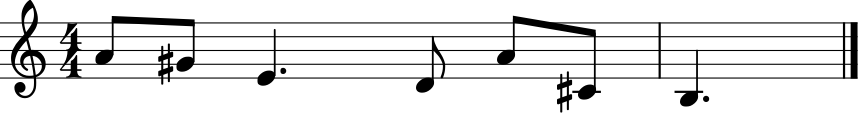

In [16]:
s3 = stream.Stream()
    
for n in range(len(predictions)):
    noteMidi = testPredictions[n+1][0]
    noteLength=testPredictions[n+1][1]
    n = note.Note(midi=noteMidi,quarterLength = noteLength)

    s3.append(n)

print("Score of predictMidi.mid")
s3.show()
StreamPlayer=midi.realtime.StreamPlayer(s3)
StreamPlayer.play()